## OUSSAMA EL ALOUI :
### Partie 1 :
Réaliser un modèle mathématique de régression linéaire (from scratch) pour la prédiction de l’émission de CO2 en fonction de 'Temperature', ' Humidity ', 'Light' et ‘HumidityRatio’.

In [83]:
# EL ALOUI OUSSAMA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Charger le dataset

In [84]:
# El Aloui OUSSAMA
data = pd.read_csv('occupancy.csv')

In [85]:
# El Aloui OUSSAMA
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [86]:
# El Aloui OUSSAMA
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [87]:
# El Aloui OUSSAMA
#Retirer des informations de notre dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [88]:
# El Aloui OUSSAMA
## Nombre d'occurence  de colonne CO2
data['CO2'].value_counts()

436.000000     11
435.000000     10
438.000000      9
451.000000      9
436.500000      9
               ..
1076.166667     1
1083.666667     1
1088.750000     1
1080.500000     1
1124.000000     1
Name: CO2, Length: 1894, dtype: int64

###  SETUP THE DATASET

In [89]:
# El Aloui OUSSAMA
X = data[['Temperature', 'Humidity', 'Light', 'HumidityRatio']].values
y = data[['CO2']].values

In [90]:
# El Aloui OUSSAMA
print(X.shape)
print(y.shape)

(2665, 4)
(2665, 1)


###  Splitting the dataset into the training set and the test set

In [91]:
# El Aloui OUSSAMA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [92]:
# El Aloui OUSSAMA
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2132, 4)
(533, 4)
(2132, 1)
(533, 1)


### - Faire la normalization sur dataset

In [93]:
# El Aloui OUSSAMA
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [94]:
# El Aloui OUSSAMA
# Voici le resultat de dataset apres sa normalisation
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2132, 4)
(533, 4)
(2132, 1)
(533, 1)


### - initialisation de biais + theta vecteur

In [95]:
# El Aloui OUSSAMA
def initializer(dim):
    w = np.zeros((dim,1))
    b = 0.
    return w,b

In [96]:
# El Aloui OUSSAMA
W, bias = initializer(X.shape[1])

In [97]:
# El Aloui OUSSAMA
print("w= ",W)
print("b= ",bias)

w=  [[0.]
 [0.]
 [0.]
 [0.]]
b=  0.0


### Implementation de modele

In [98]:
# El Aloui OUSSAMA
def model(w,b,X):
    return np.dot(X,w) + b

### Lost function

In [99]:
# El Aloui OUSSAMA
def cost_function(w,b,X,y):
    m = len(X)
    return 1/(2*m) * np.sum((model(w,b,X)-y)**2)

In [100]:
# El Aloui OUSSAMA
print(cost_function(W,bias,X,y))

300510.07227747096


### - Gradient descent

In [101]:
# El Aloui OUSSAMA
def gradient(w,b,X,y):
    m = X.shape[0]
    dw = 1/m * np.dot(X.T,model(w,b,X)-y)
    db = 1/m * np.sum(model(w,b,X)-y)
    return dw, db

In [102]:
# El Aloui OUSSAMA
def gradient_descent(w,b,X,y,learning_rate,epochs):
    lost_func= []
    for i in range(epochs):
        dw,db = gradient(w,b,X,y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        lost_func.append(cost_function(w,b,X,y))
    return w,b,lost_func

### - Entrainement de modele

In [103]:
# El Aloui OUSSAMA
learning_rate = 0.6
epochs = 10000
final_W,final_b,loss_list = gradient_descent(W,bias,X_train,y_train,learning_rate,epochs)

In [104]:
# El Aloui OUSSAMA
#Affichage de MSE
for i in range(len(loss_list)):
    if i%500 == 0:
        print(loss_list[i])

0.4812916723628565
0.024018301754938215
0.02367532215240535
0.02346733017499574
0.0233411954183445
0.023264702194742193
0.023218313606755695
0.023190181688736797
0.02317312135459487
0.02316277527720197
0.02315650099696048
0.023152696019377795
0.023150388526908927
0.02314898917004594
0.023148140543384575
0.023147625901816404
0.023147313802331745
0.023147124532567405
0.02314700975171882
0.02314694014396479


## 9- The learning curve

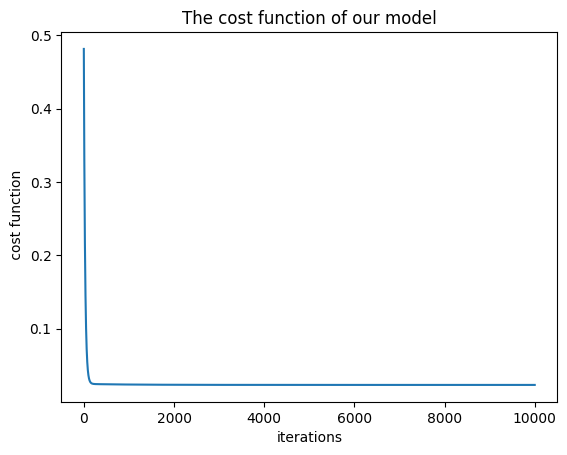

In [105]:
# El Aloui OUSSAMA

plt.plot(loss_list)
plt.title('The cost function of our model')
plt.xlabel('iterations')
plt.ylabel(' cost function')
plt.show()

### Ploting la comparaison entre y_train et y_predict

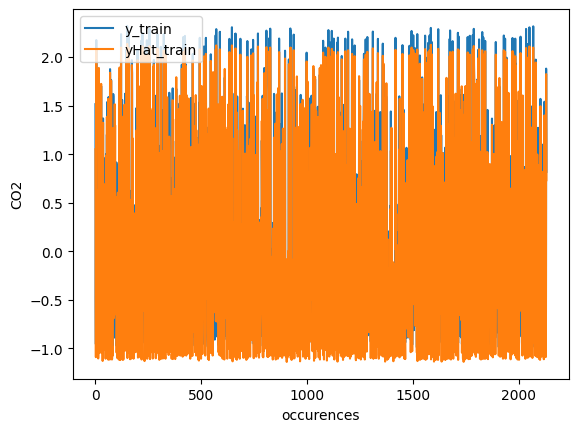

In [106]:
# El Aloui OUSSAMA
from sklearn.metrics import r2_score
yHat_train = model(final_W,final_b,X_train)


plt.plot(y_train, label='y_train')
plt.plot(yHat_train, label='yHat_train')
plt.xlabel('occurences')
plt.ylabel('CO2')
plt.legend()
plt.show()

In [107]:
# El Aloui OUSSAMA
from sklearn.metrics import r2_score
yHat_train = model(final_W,final_b,X_train)
score_training = r2_score(y_train, yHat_train)
print("Accuracy >> ", score_training )

Accuracy >>  0.9537062040077946


### Ploting la comparaison entre y_test et y_predict

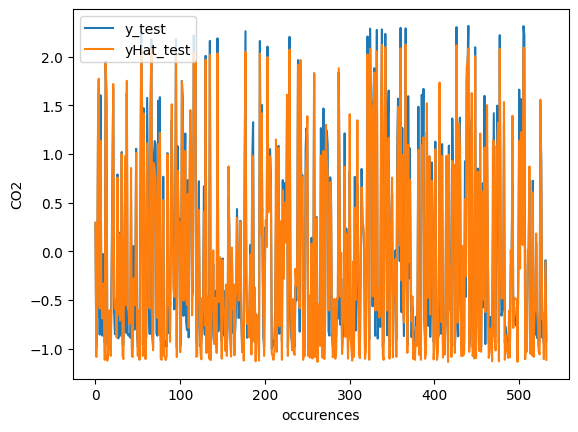

In [108]:
# El Aloui OUSSAMA
from sklearn.metrics import r2_score
yHat_test = model(final_W,final_b,X_test)


plt.plot(y_test, label='y_test')
plt.plot(yHat_test, label='yHat_test')
plt.xlabel('occurences')
plt.ylabel('CO2')
plt.legend()
plt.show()

In [109]:
# El Aloui OUSSAMA
from sklearn.metrics import r2_score
yHat_test = model(final_W,final_b,X_test)
score_training = r2_score(y_test, yHat_test)
print("Accuracy >> ", score_training )

Accuracy >>  0.952407376634119


# Partie 2
> 1. **a). Réaliser un modèle mathématique de régression logistique pour la classification
binaire de la 'Occupancy’ en fonction de 'CO2' et 'Light'.
<br>b). Tracer la frontière de décision.**

---

### - SETUP THE DATASET

In [182]:
# El Aloui OUSSAMA
X = data[['CO2', 'Light']].values
y = data[['Occupancy']].values

In [183]:
# El Aloui OUSSAMA
print(X.shape)
print(y.shape)

(2665, 2)
(2665, 1)


### - Separation de X_train, x_test , y_train et y_test

In [211]:
# El Aloui OUSSAMA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

In [212]:
# El Aloui OUSSAMA
print(X_train.shape)
print(X_test.shape)

(1865, 5)
(800, 5)


### - Normalization sur dataset

In [213]:
# El Aloui OUSSAMA
from sklearn.preprocessing import StandardScaler
X_N = StandardScaler()
X_train = X_N.fit_transform(X_train)
X_test = X_N.transform(X_test)

### - Initialization de bais et W

In [214]:
# El Aloui OUSSAMA
def initialisation():
  w = np.zeros((X.shape[1],1))
  b = 0
  return w, b

In [215]:
# El Aloui OUSSAMA
w, b = initialisation()
w , b

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 0)

## 5- The sigmoid function

In [216]:
#EL ALOUI OUSSAMA
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [217]:
#EL ALOUI OUSSAMA
def model(X,W,b):
    Z = X.dot(W)+b
    return sigmoid(Z)

In [218]:
#EL ALOUI OUSSAMA
#Fonction loss
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
log_loss(y, model(X,w,b))

0.6931471805599453

In [219]:
#EL ALOUI OUSSAMA
def gradient(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [220]:
#EL ALOUI OUSSAMA
#Optimisation - Gradient et Descente de Gradient
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradient(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [221]:
#EL ALOUI OUSSAMA
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation()
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = model(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)
 # Prediction
    plt.plot(loss_history, label='loss_history')
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution of errors')
    plt.show()

    return W,b, loss_history

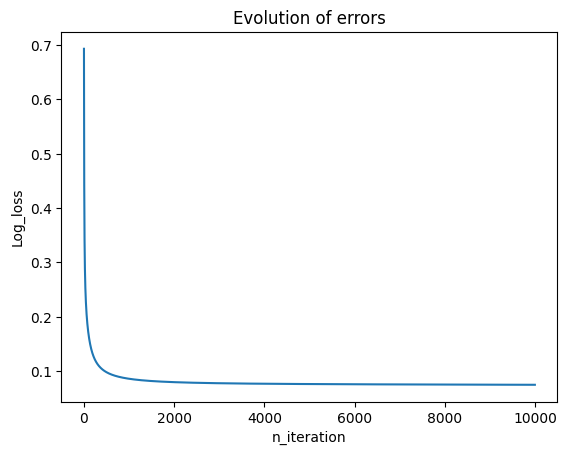

In [222]:
w,b,l=regression_logistique(X_train,y_train,learning_rate=0.01, n_iter=10000)


In [223]:
def predict(X_test, W, b):
    A = model(X_test, W, b)
    return A, A >= 0.5   #if A>= 0.5 (true) else (false)

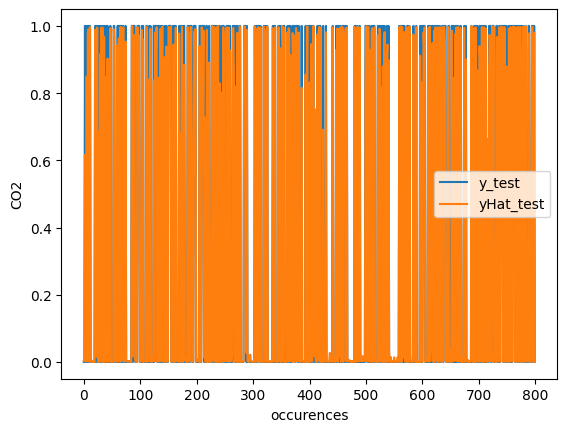

In [224]:
# El Aloui OUSSAMA
#PLOTING yHat_test and y_test to see the similarity between them
from sklearn.metrics import r2_score
yHat_test, semantic = predict(X_test,w,b)


plt.plot(y_test, label='y_test')
plt.plot(yHat_test, label='yHat_test')
plt.xlabel('occurences')
plt.ylabel('CO2')
plt.legend()
plt.show()

In [225]:
#OUSSAMA EL ALOUI
#ACCURACY OF THE MODEL : 
from sklearn.metrics import accuracy_score
yHat, semantic = predict(X_train,w,b)
accuracy_train = accuracy_score(y_train, semantic)
#_____________pour y_test
yHat, semantic = predict(X_test,w,b)
accuracy_test = accuracy_score(y_test, semantic)
print("Accuracy =", accuracy_train)
print("Accuracy =", accuracy_test)

Accuracy = 0.9769436997319035
Accuracy = 0.9825


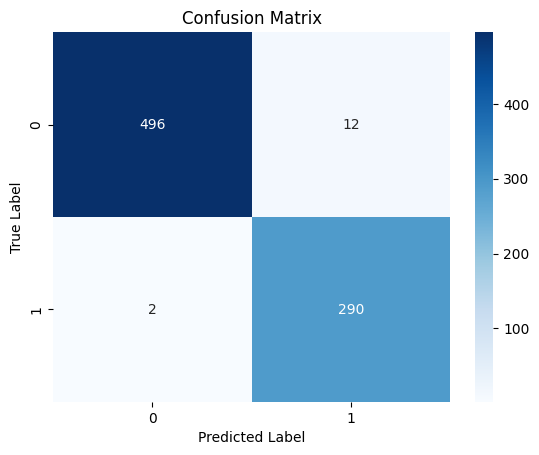

In [226]:
#OUSSAMA EL ALOUI
#CONFUSION MATRIX
import seaborn as sns
from sklearn.metrics import confusion_matrix 

# Prédiction sur l'ensemble de test
y_pred, semantic = predict(X_test , w, b)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, semantic)

# Affichage de la matrice de confusion avec un heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### 2) Réaliser un modèle mathématique de régression logistique pour la classification binaire de la 'Occupancy’ en fonction de 'Temperature', ' Humidity ', 'Light', ‘CO2’ et ‘HumidityRatio’.

#### SETUP THE DATASET

In [202]:
# El Aloui OUSSAMA
X = data[['CO2', 'Light','Temperature', 'Humidity','HumidityRatio']].values
y = data[['Occupancy']].values

In [203]:
# El Aloui OUSSAMA
print(X.shape)
print(y.shape)

(2665, 5)
(2665, 1)


In [204]:
# El Aloui OUSSAMA
# Separation de X_train, x_test , y_train et y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [205]:
# El Aloui OUSSAMA
print(X_train.shape)
print(X_test.shape)

(2132, 5)
(533, 5)


In [206]:
# El Aloui OUSSAMA
#Normalization sur dataset
from sklearn.preprocessing import StandardScaler
X_N = StandardScaler()
X_train = X_N.fit_transform(X_train)
X_test = X_N.transform(X_test)

In [207]:
# El Aloui OUSSAMA
w, b = initialisation()
w , b

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 0)

 #### The sigmoid function

In [208]:
#EL ALOUI OUSSAMA
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [209]:
#EL ALOUI OUSSAMA
def model(X,W,b):
    Z = X.dot(W)+b
    return sigmoid(Z)

In [210]:
#EL ALOUI OUSSAMA
#Fonction loss
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
log_loss(y, model(X,w,b))

0.6931471805599453

In [169]:
#EL ALOUI OUSSAMA
def gradient(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [170]:
#EL ALOUI OUSSAMA
#Optimisation - Gradient et Descente de Gradient
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradient(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [171]:
#EL ALOUI OUSSAMA
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation()
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = model(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)
 # Prediction
    plt.plot(loss_history, label='loss_history')
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution of errors')
    plt.show()

    return W,b, loss_history

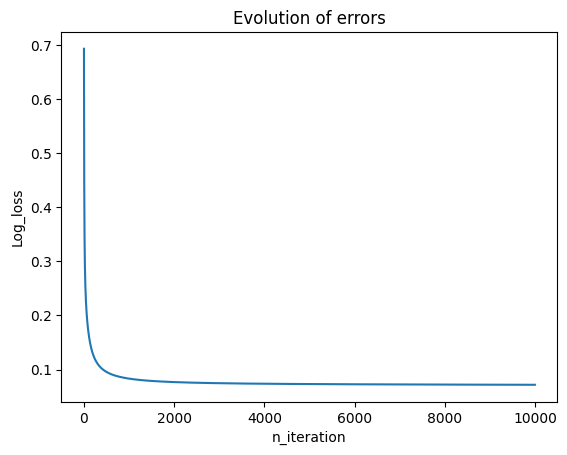

In [172]:
#EL ALOUI OUSSAMA
w,b,l=regression_logistique(X_train,y_train,learning_rate=0.01, n_iter=10000)


In [173]:
#EL ALOUI OUSSAMA
#PREDICT FUNCTION
def predict(X_test, W, b):
    A = model(X_test, W, b)
    return A, A >= 0.5   #if A>= 0.5 (true) else (false)

In [174]:
#EL ALOUI OUSSAMA
#ACCURACY OF THE MODEL : 
from sklearn.metrics import accuracy_score
yHat, semantic = predict(X_train,w,b)
accuracy_train = accuracy_score(y_train, semantic)
#_____________pour y_test
yHat, semantic = predict(X_test,w,b)
accuracy_test = accuracy_score(y_test, semantic)
print("Accuracy =", accuracy_train)
print("Accuracy =", accuracy_test)

Accuracy = 0.9774859287054409
Accuracy = 0.9831144465290806


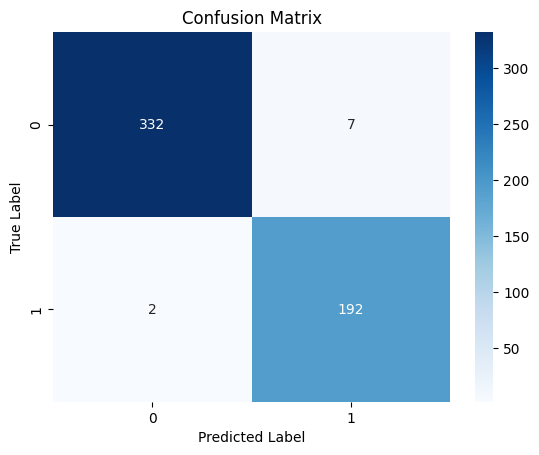

In [175]:
#OUSSAMA EL ALOUI
#CONFUSION MATRIX
import seaborn as sns
from sklearn.metrics import confusion_matrix 

# Prédiction sur l'ensemble de test
y_pred, semantic = predict(X_test , w, b)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, semantic)

# Affichage de la matrice de confusion avec un heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
